In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [ ]:
data = pd.read_csv('/content/advertising.csv')

In [ ]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/advertising.csv')

# Data Exploration
print("Dataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
# 1. Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# 2. Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (if necessary) - Standardize the features to bring them to a similar scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Model performance
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 8. Model coefficients (Feature Importance)
coefficients = pd.DataFrame({'Feature': ['TV', 'Radio', 'Newspaper'], 'Coefficient': model.coef_})
print("\nModel Coefficients (Feature Importance):")
print(coefficients)

Mean Squared Error: 2.9077569102710927
R-squared: 0.9059011844150825

Model Coefficients (Feature Importance):
     Feature  Coefficient
0         TV     4.587208
1      Radio     1.489840
2  Newspaper     0.087916


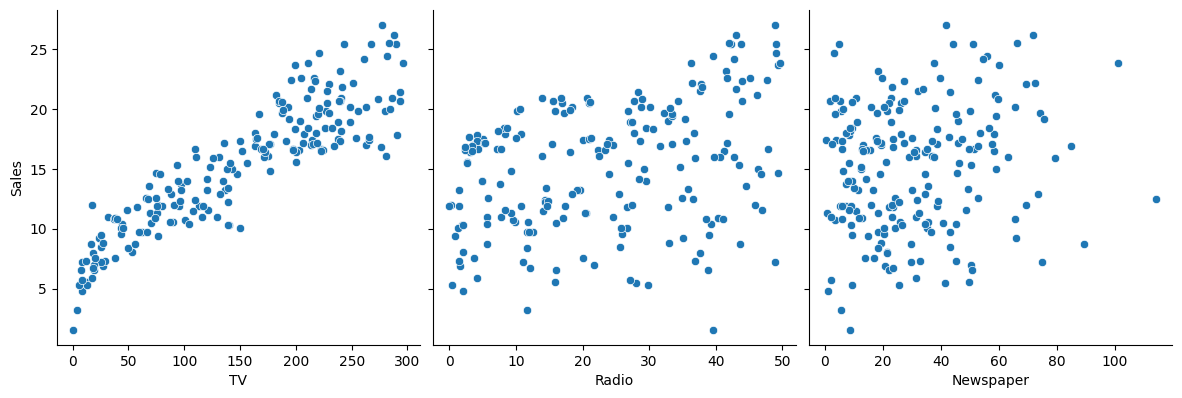

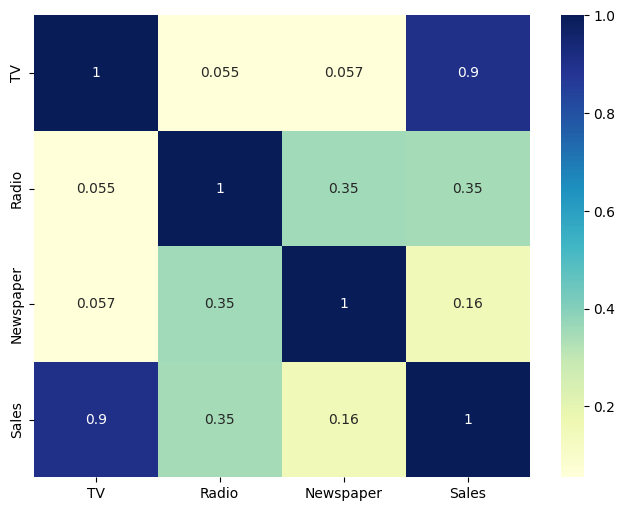

In [ ]:
# Data Visualization
# Pairplot to visualize the relationships between features and target
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Correlation heatmap to understand feature correlations
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

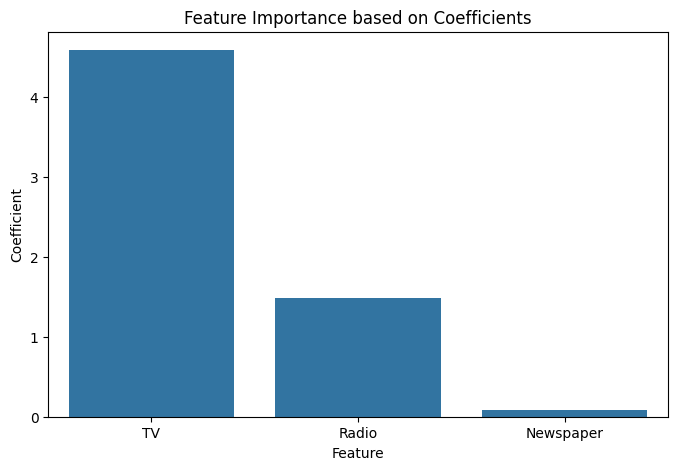

In [ ]:


#  Plotting feature importance (coefficients)
plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title('Feature Importance based on Coefficients')
plt.show()



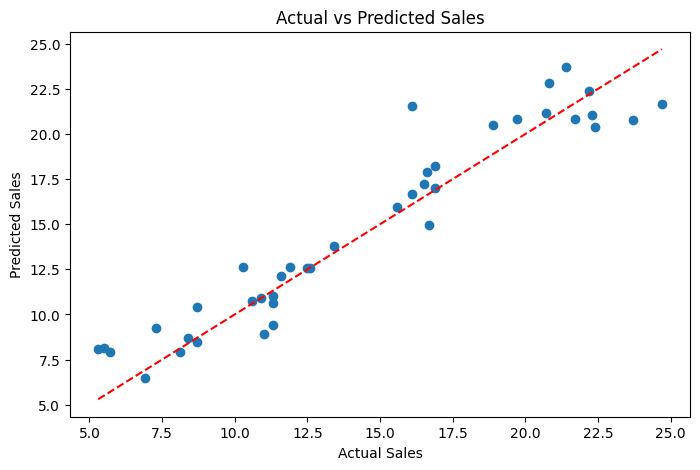

In [ ]:
# Residuals plot (to check for linearity)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()



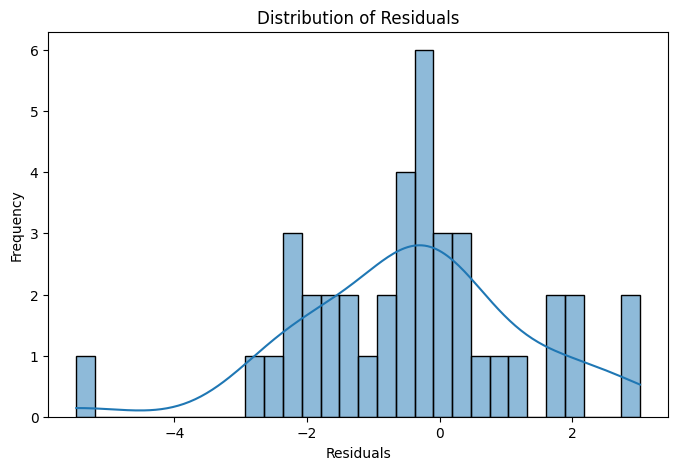

In [ ]:
# Check for errors distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

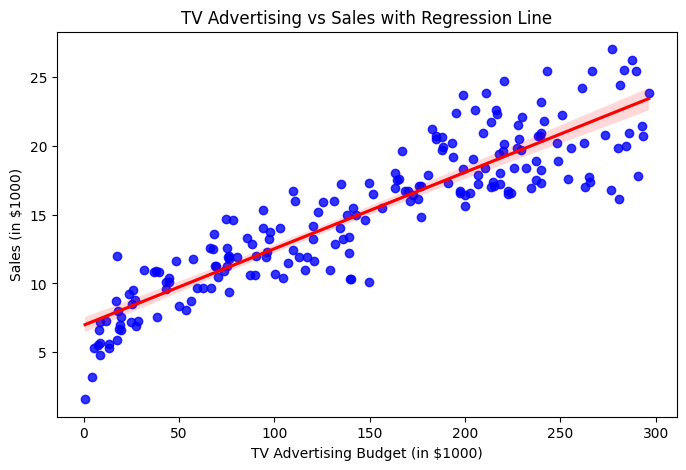

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot TV advertising vs Sales with a regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='TV', y='Sales', data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('TV Advertising vs Sales with Regression Line')
plt.xlabel('TV Advertising Budget (in $1000)')
plt.ylabel('Sales (in $1000)')
plt.show()


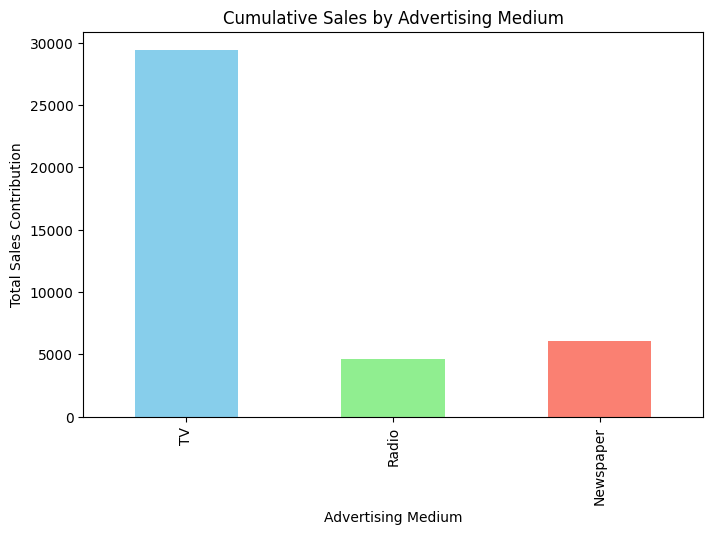

In [ ]:
# Create a stacked bar chart showing the cumulative sales contribution from TV, Radio, and Newspaper

# Create a normalized version of the advertising columns
data['Total_Advertising'] = data['TV'] + data['Radio'] + data['Newspaper']

# Create a cumulative sales chart for each advertising channel
data[['TV', 'Radio', 'Newspaper']].sum().plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'], figsize=(8, 5))
plt.title('Cumulative Sales by Advertising Medium')
plt.ylabel('Total Sales Contribution')
plt.xlabel('Advertising Medium')
plt.show()


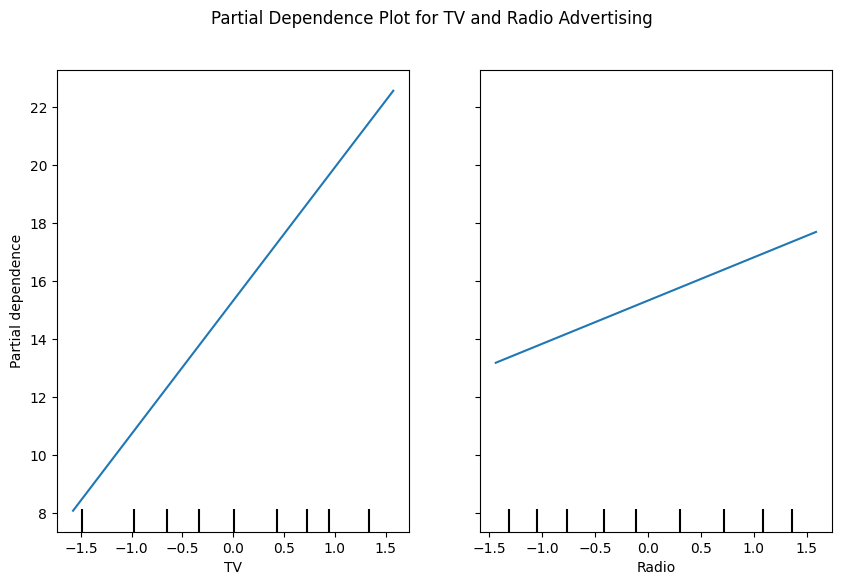

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Train the model on the entire dataset for PDP analysis
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Create Partial Dependence Plots for TV and Radio
fig, ax = plt.subplots(figsize=(10, 6))
# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(model, X_train_scaled, [0, 1], feature_names=['TV', 'Radio'], ax=ax)
plt.suptitle('Partial Dependence Plot for TV and Radio Advertising')
plt.show()